# Domain= Automobile

# Title: Data Analysis on Motorbikes

In [1]:
!pip install pandas

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv(r"C:\Users\91988\Downloads\droom_Used_Bikes.csv")

In [7]:
data.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [8]:
data.tail()

,bike_name,price,city,kms_driven,owner,age,power,brand
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero
32647,Bajaj Pulsar 150cc,22000.0,Pune,60857.0,First Owner,13.0,150.0,Bajaj


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [10]:
data.shape

(32648, 8)

In [11]:
data.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


# 3.What is the distribution of kilometers driven by bikes?


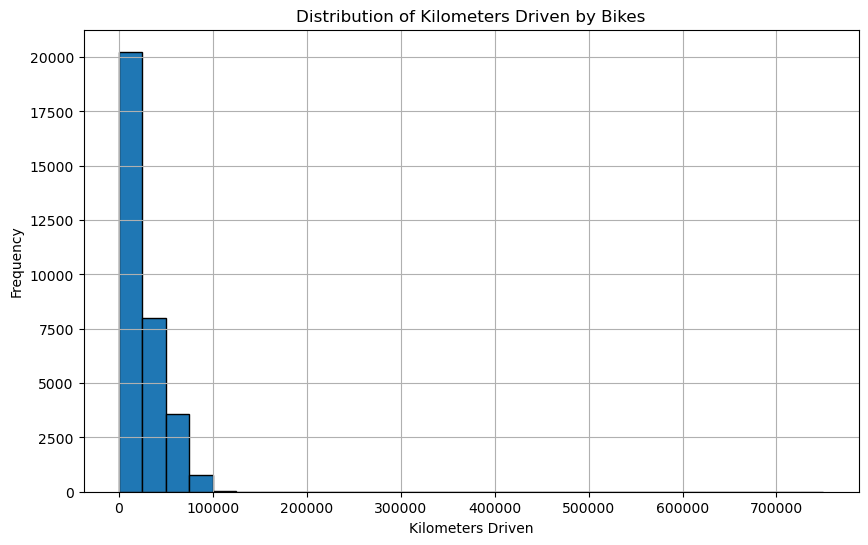

In [18]:
data_clean = data.dropna(subset=['kms_driven'])

# Convert 'kms_driven' to numeric if it's not already
data_clean['kms_driven'] = pd.to_numeric(data_clean['kms_driven'], errors='coerce')

# Drop rows where conversion resulted in NaN values
data_clean = data_clean.dropna(subset=['kms_driven'])

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(data_clean['kms_driven'], bins=30, edgecolor='black')
plt.title('Distribution of Kilometers Driven by Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 1 What is the average resale price of bikes in different cities?


In [18]:
# Calculate average resale price by city
avg_resale_price= data.groupby('city')['price'].mean().reset_index()
print("Average Resale Price of Bikes in Different Cities:")
print(avg_resale_price.head(10))



Average Resale Price of Bikes in Different Cities:
         city          price
0  24 Pargana   71263.636364
1      Abohar   95000.000000
2      Adalaj   31580.000000
3       Adoni  150000.000000
4       Adyar  116333.333333
5        Agra   30558.333333
6   Ahmedabad   45176.149171
7  Ahmednagar   55500.000000
8       Ajmer  164650.000000
9        Akot   12000.000000


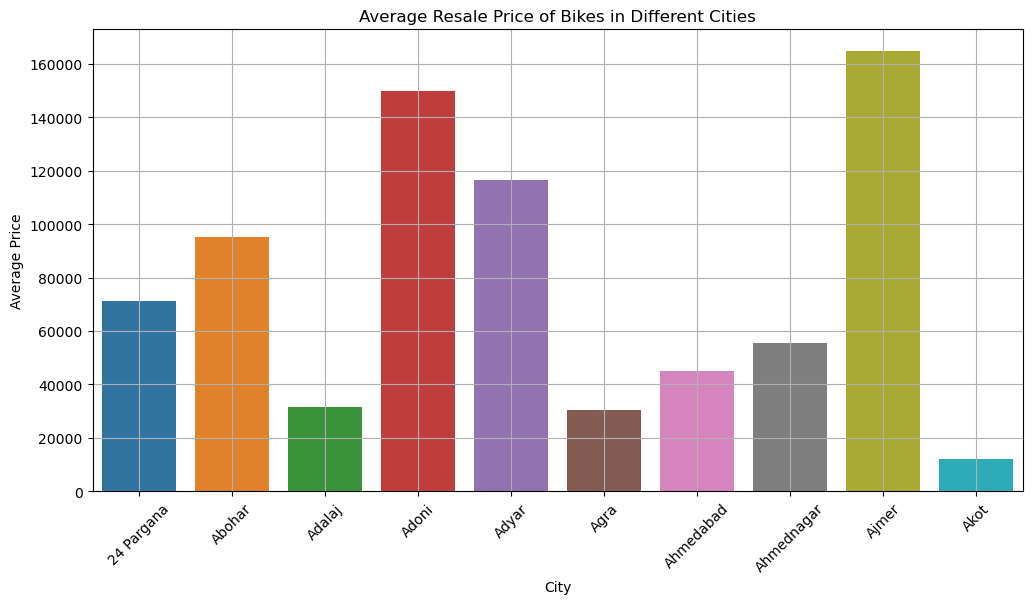

In [20]:
# Plotting the average resale price by city
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='price', data=avg_resale_price.head(10))
plt.title('Average Resale Price of Bikes in Different Cities')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 2.How does the resale price vary by bike brand?


Average Resale Price by Bike Brand:
              brand         price
0               BMW  5.987500e+05
1             Bajaj  4.833127e+04
2           Benelli  2.942000e+05
3            Ducati  9.355455e+05
4   Harley-Davidson  4.529988e+05
5              Hero  2.382945e+04
6             Honda  5.923047e+04
7           Hyosung  2.491678e+05
8             Ideal  1.000000e+05
9            Indian  1.100000e+06
10             Jawa  1.855000e+05
11              KTM  1.746697e+05
12         Kawasaki  4.116246e+05
13              LML  4.400000e+03
14               MV  1.325000e+06
15         Mahindra  7.250709e+04
16          Rajdoot  7.500000e+04
17    Royal Enfield  9.856207e+04
18           Suzuki  4.594683e+04
19              TVS  4.429915e+04
20          Triumph  8.274230e+05
21           Yamaha  5.706896e+04
22            Yezdi  6.800000e+04


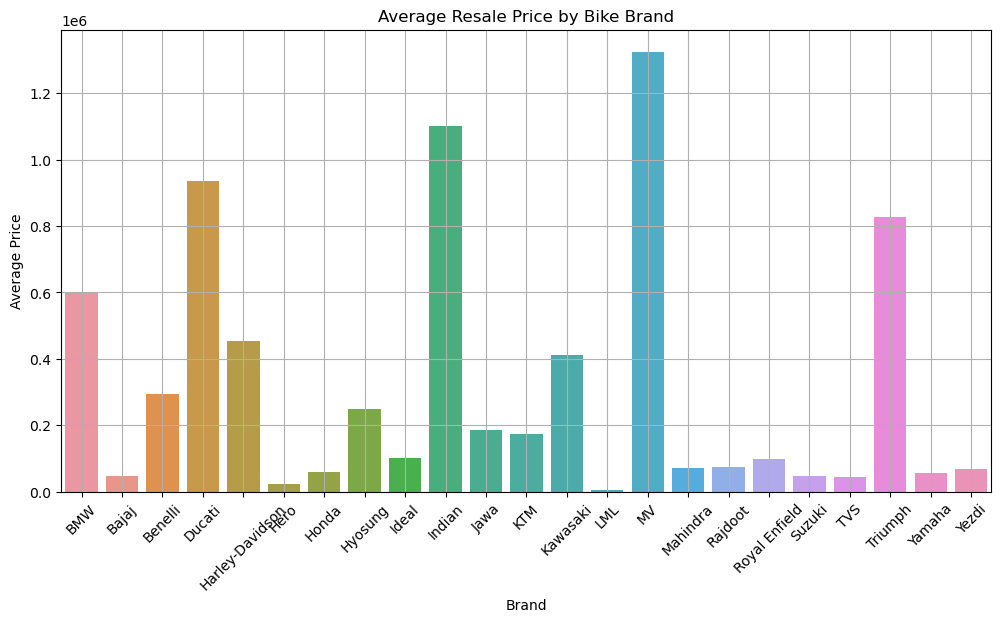

In [14]:
avg_resale_price_by_brand = data.groupby('brand')['price'].mean().reset_index()
print("Average Resale Price by Bike Brand:")
print(avg_resale_price_by_brand)

# Plotting the average resale price by brand
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=avg_resale_price_by_brand)
plt.title('Average Resale Price by Bike Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3.What is the distribution of kilometers driven by bikes?


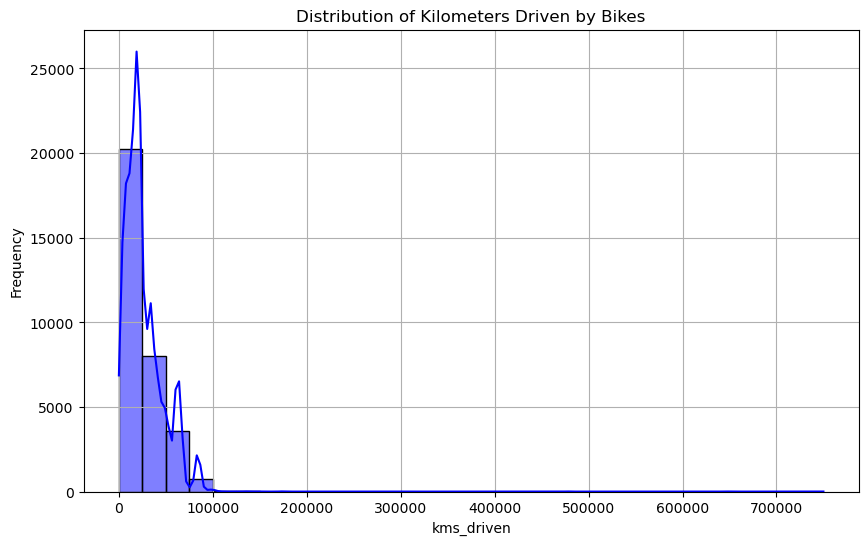

In [49]:
# Plotting the distribution of kilometers driven
plt.figure(figsize=(10, 6))
sns.histplot(data['kms_driven'], bins=30, kde=True, color='blue')
plt.title('Distribution of Kilometers Driven by Bikes')
plt.xlabel('kms_driven')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 5.What is the average age of bikes listed in different cities?


Average Age of Bikes Listed in Different Cities:
         city        age
0  24 Pargana   5.090909
1      Abohar   8.000000
2      Adalaj   8.400000
3       Adoni   4.000000
4       Adyar   7.333333
5        Agra  10.250000
6   Ahmedabad  10.614365
7  Ahmednagar   7.142857
8       Ajmer   7.833333
9        Akot  13.000000


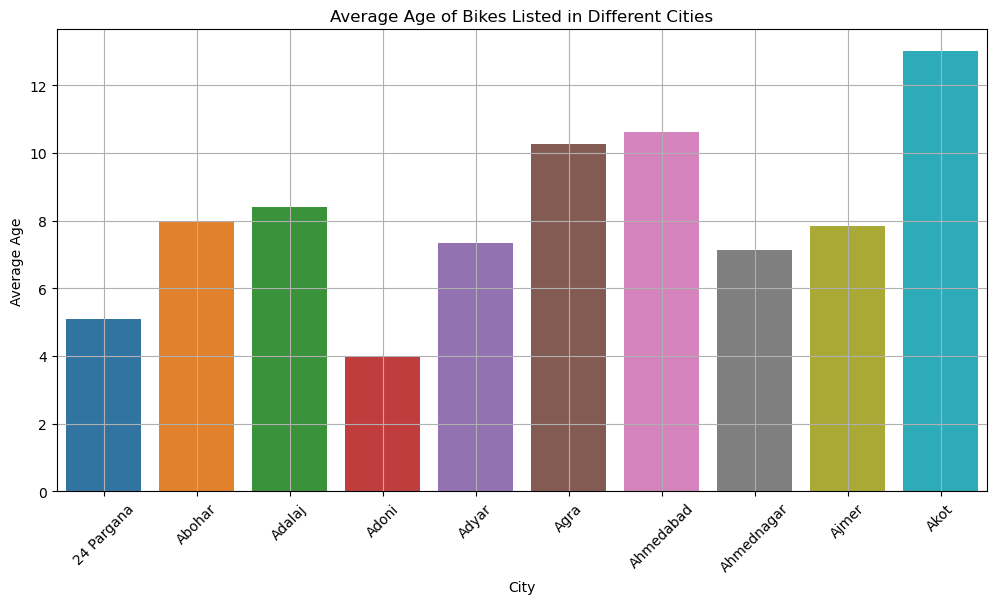

In [13]:


# Calculate average age by city
avg_age = data.groupby('city')['age'].mean().reset_index()
print("Average Age of Bikes Listed in Different Cities:")
print(avg_age.head(10))

# Plotting the average age by city
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='age', data=avg_age.head(10))
plt.title('Average Age of Bikes Listed in Different Cities')
plt.xlabel('City')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 6.How does the power (in CC) of bikes vary by brand?


Average Power (in CC) by Bike Brand:
              brand        power
0               BMW   463.750000
1             Bajaj   196.314546
2           Benelli   380.285714
3            Ducati  1016.136364
4   Harley-Davidson   758.204885
5              Hero   116.179962
6             Honda   152.673150
7           Hyosung   400.000000
8             Ideal   250.000000
9            Indian  1353.333333
10             Jawa   295.000000
11              KTM   346.759517
12         Kawasaki   570.886076
13              LML   110.000000
14               MV   872.500000
15         Mahindra   192.909091
16          Rajdoot   175.000000
17    Royal Enfield   366.104596
18           Suzuki   138.244536
19              TVS   170.994387
20          Triumph   893.076923
21           Yamaha   169.350102
22            Yezdi   250.000000


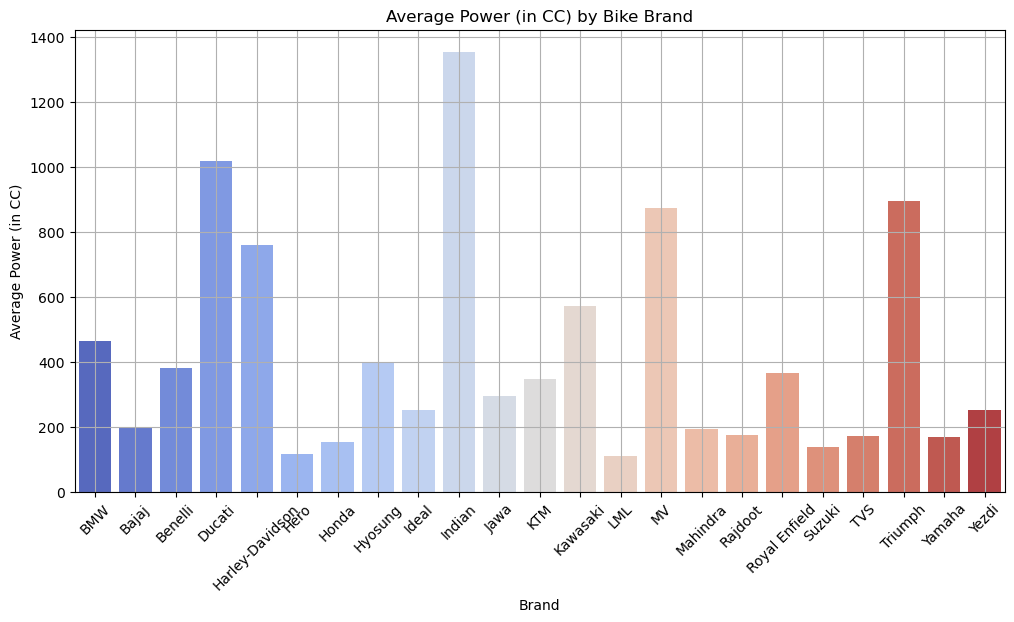

In [52]:
# Calculate average power by brand
avg_power = data.groupby('brand')['power'].mean().reset_index()
print("Average Power (in CC) by Bike Brand:")
print(avg_power)

# Plotting the average power by brand
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='power', data=avg_power, palette='coolwarm')
plt.title('Average Power (in CC) by Bike Brand')
plt.xlabel('Brand')
plt.ylabel('Average Power (in CC)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 7.How does the resale price vary by the power of the bike?


Average Resale Price by Power (in CC):
   power         price
0  100.0  2.497102e+04
1  107.0  1.100000e+06
2  110.0  3.266094e+04
3  125.0  2.843680e+04
4  135.0  2.410403e+04
5  149.0  6.200000e+04
6  150.0  3.192986e+04
7  160.0  7.657524e+04
8  175.0  7.500000e+04
9  180.0  3.364318e+04


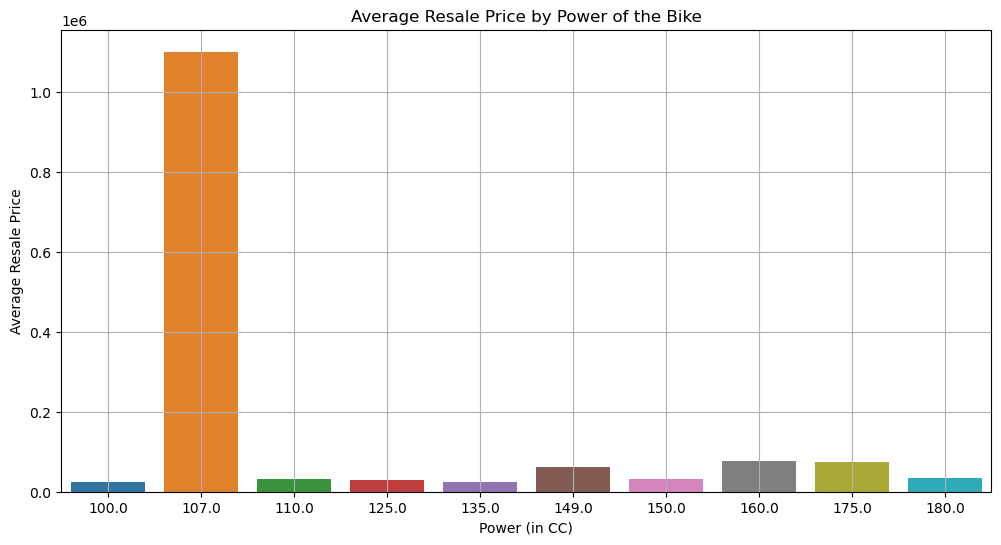

In [54]:
# Calculate average resale price by power
avg_price = data.groupby('power')['price'].mean().reset_index()
print("Average Resale Price by Power (in CC):")
print(avg_price.head(10))

# Plotting the average resale price by power
plt.figure(figsize=(12, 6))
sns.barplot(x='power', y='price', data=avg_price.head(10) )
plt.title('Average Resale Price by Power of the Bike')
plt.xlabel('Power (in CC)')
plt.ylabel('Average Resale Price')
plt.grid(True)
plt.show()

# 8.What is the relationship between kilometers driven and the age of the bike?


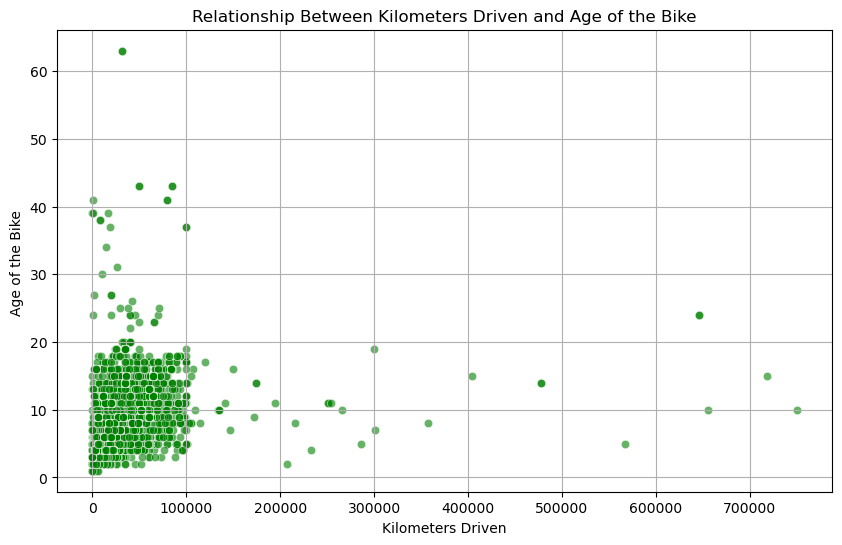

In [9]:
# Plotting the relationship between kilometers driven and age of the bike
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='age', data=data, color='green', alpha=0.6)
plt.title('Relationship Between Kilometers Driven and Age of the Bike')
plt.xlabel('Kilometers Driven')
plt.ylabel('Age of the Bike ')
plt.grid(True)
plt.show()

# 9.How does the resale price vary by the city where the bike is listed?


Average Resale Price by City:
         city          price
0  24 Pargana   71263.636364
1      Abohar   95000.000000
2      Adalaj   31580.000000
3       Adoni  150000.000000
4       Adyar  116333.333333
5        Agra   30558.333333
6   Ahmedabad   45176.149171
7  Ahmednagar   55500.000000
8       Ajmer  164650.000000
9        Akot   12000.000000


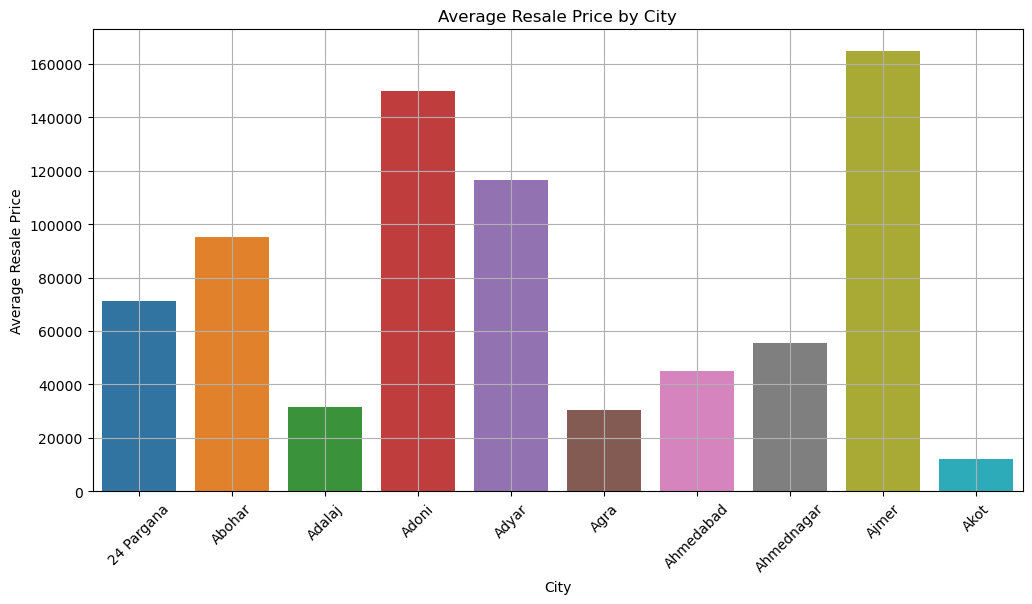

In [12]:
# Calculate average resale price by city
avg_resale_price = data.groupby('city')['price'].mean().reset_index()
print("Average Resale Price by City:")
print(avg_resale_price.head(10))

# Plotting the average resale price by city
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='price', data=avg_resale_price.head(10))
plt.title('Average Resale Price by City')
plt.xlabel('City')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 10.What is the average power (in CC) of bikes in different cities?


In [28]:
avg_power = data.groupby('city')['power'].mean().reset_index()
print("Average Power (in CC) of Bikes Listed in Different Cities:")
print(avg_power.tail(10))



Average Power (in CC) of Bikes Listed in Different Cities:
              city       power
433       Viramgam  350.000000
434          Virar  246.000000
435   Virudhunagar  233.333333
436  Visakhapatnam  221.875000
437   Vizianagaram  390.000000
438       Warangal  275.000000
439         Wardha  143.250000
440   Yamuna Nagar  200.000000
441     Yemmiganur  150.000000
442       Zirakpur  150.000000


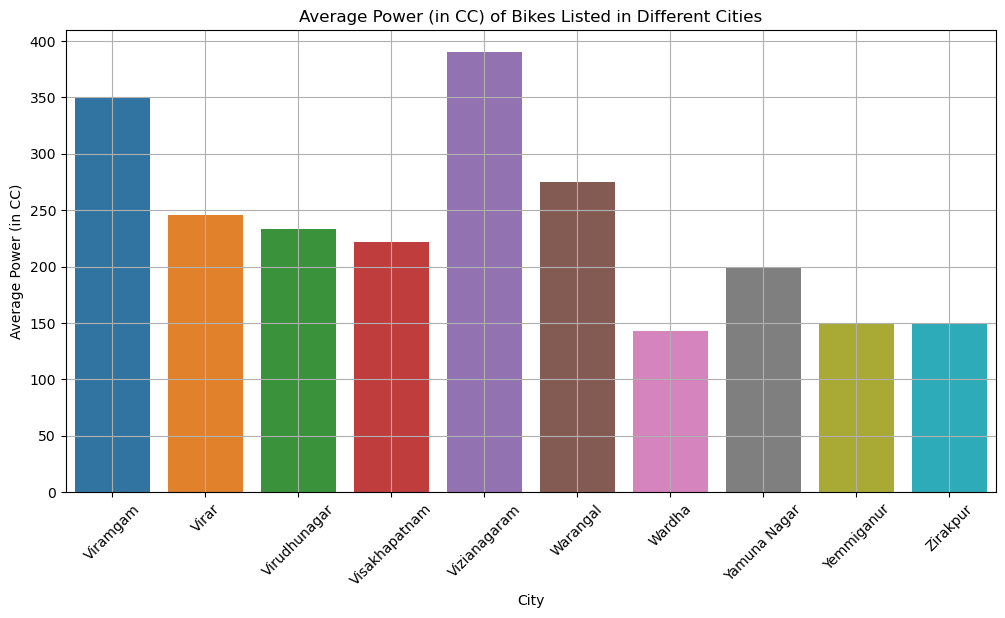

In [29]:
# Plotting the average power by city
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='power', data=avg_power.tail(10))
plt.title('Average Power (in CC) of Bikes Listed in Different Cities')
plt.xlabel('City')
plt.ylabel('Average Power (in CC)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [10]:
data.head(2)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield


# 19.How does the number of owners affect the kilometers driven by the bike?


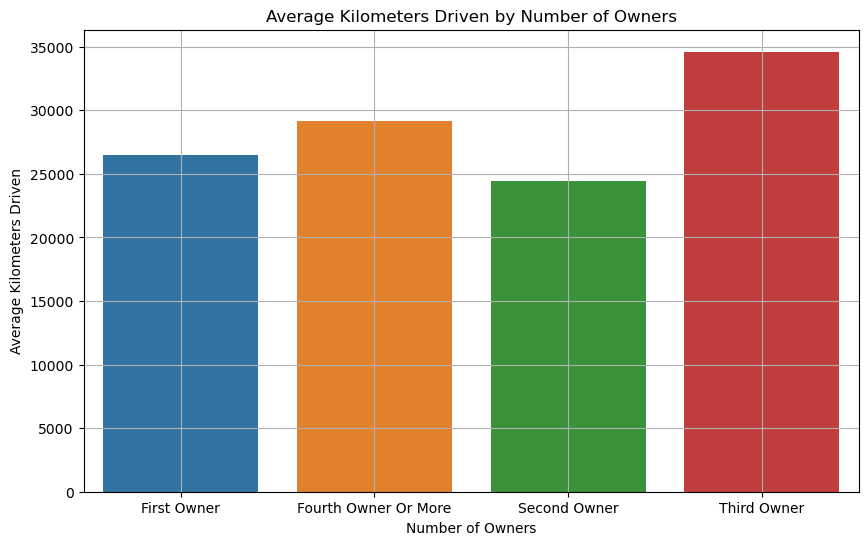

In [31]:
kms_affect_by_driven = data_clean.groupby('owner')['kms_driven'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='owner', y='kms_driven', data=kms_affect_by_driven)
plt.title('Average Kilometers Driven by Number of Owners')
plt.xlabel('Number of Owners')
plt.ylabel('Average Kilometers Driven')
plt.grid(True)
plt.show()

# 20.What is the relationship between the power of the bike and its resale price?


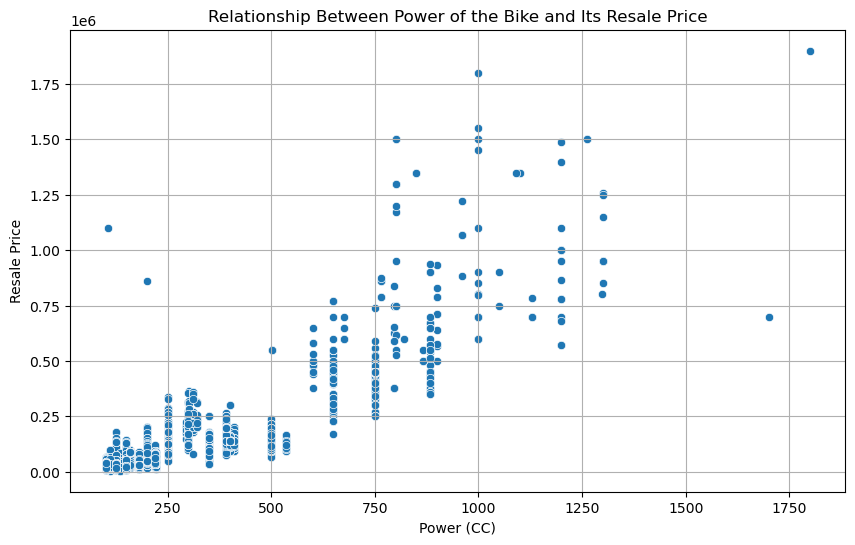

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='power', y='price', data=data_clean)
plt.title('Relationship Between Power of the Bike and Its Resale Price')
plt.xlabel('Power (CC)')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()

# 21.How does the resale price vary by different combinations of kilometers driven and power of the bike?


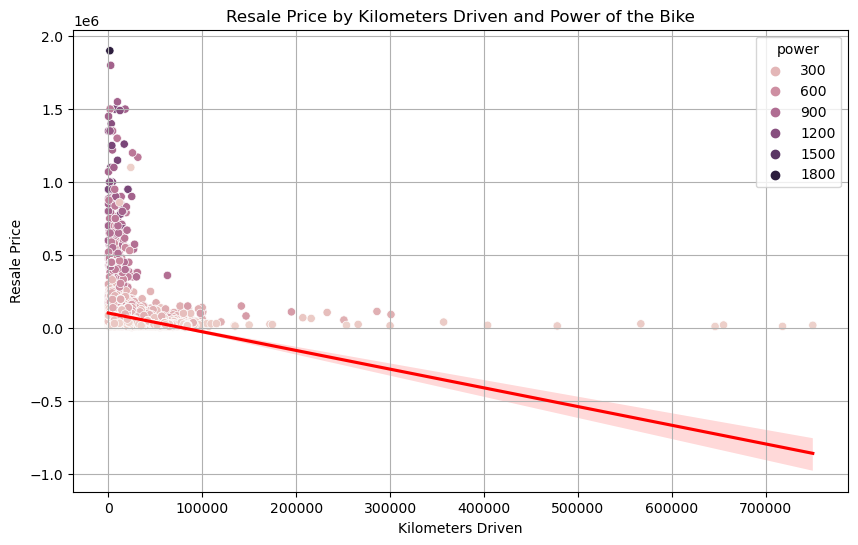

In [36]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='price', hue='power', data=data_clean)
sns.regplot(x='kms_driven', y='price', data=data_clean, scatter=False, color='red')
plt.title('Resale Price by Kilometers Driven and Power of the Bike')
plt.xlabel('Kilometers Driven')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()

# 22.What is the distribution of bike resale prices in different cities?


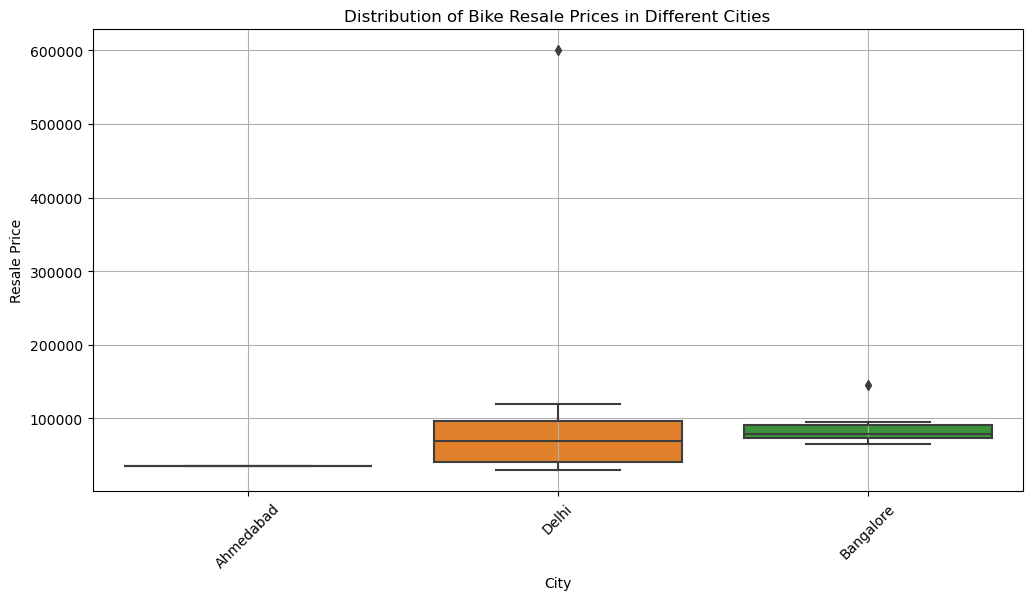

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price', data=data_clean.head(15))
plt.title('Distribution of Bike Resale Prices in Different Cities')
plt.xlabel('City')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 24.What is the relationship between the city where the bike is listed and its power (in CC)?


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

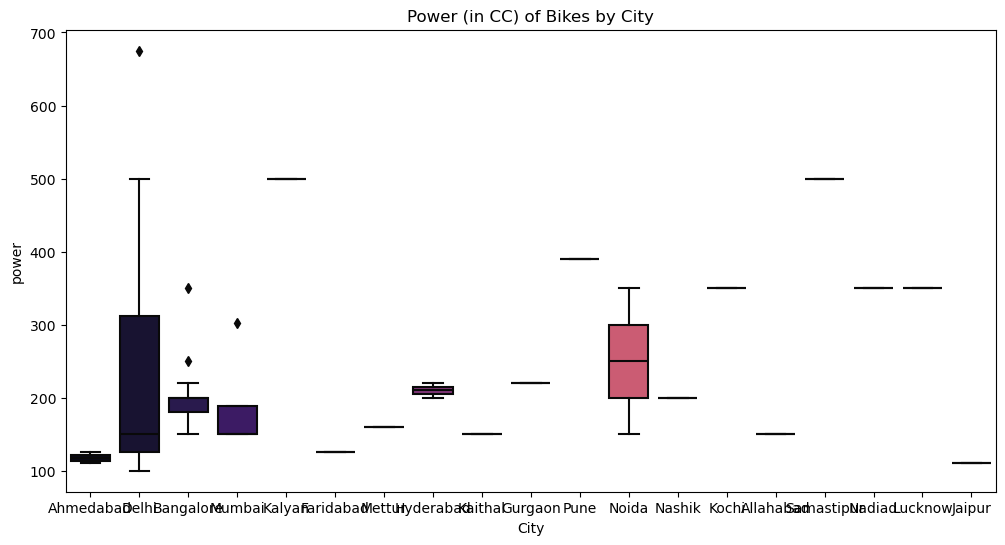

In [45]:
# Boxplot of power by city
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='power', data=data_clean.head(50), palette='magma')
plt.title('Power (in CC) of Bikes by City')
plt.xlabel('City')
plt.ylabel

In [48]:
data.head(1)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS


# 13.How does the resale price vary by kilometers driven?


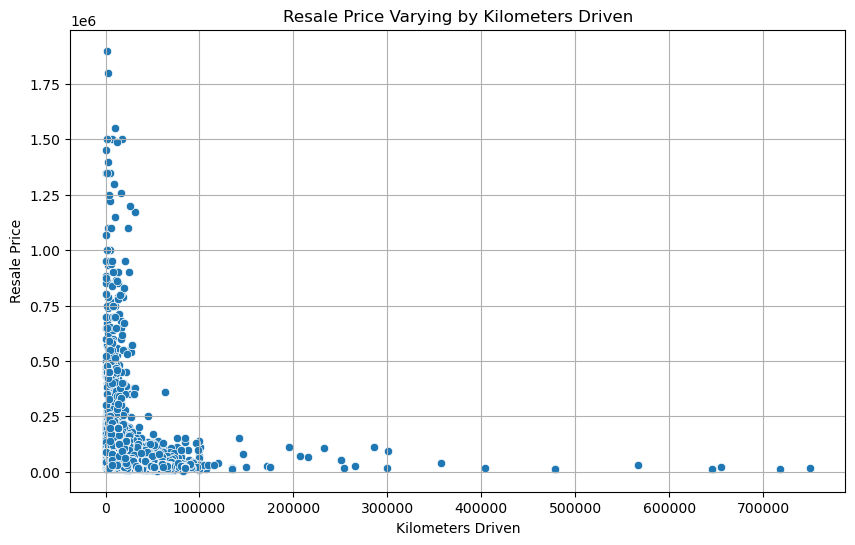

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='price', data=data_clean)
plt.title('Resale Price Varying by Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()


# 25.How Does the Resale Price Vary by Different Combinations of Bike Brand and Number of Owners?

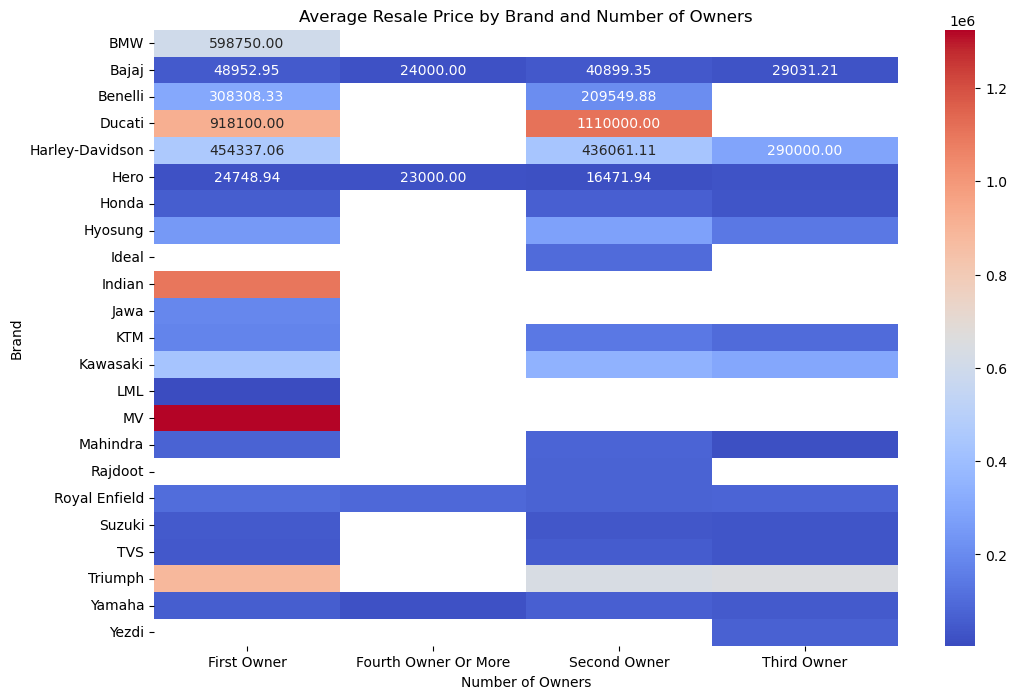

In [52]:
average_price_by_brand_and_owners = (
    data_clean.groupby(['brand', 'owner'])['price']
    .mean()
    .unstack()
)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(average_price_by_brand_and_owners, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Resale Price by Brand and Number of Owners')
plt.xlabel('Number of Owners')
plt.ylabel('Brand')
plt.show()


# 20.What is the relationship between the power of the bike and its resale price?


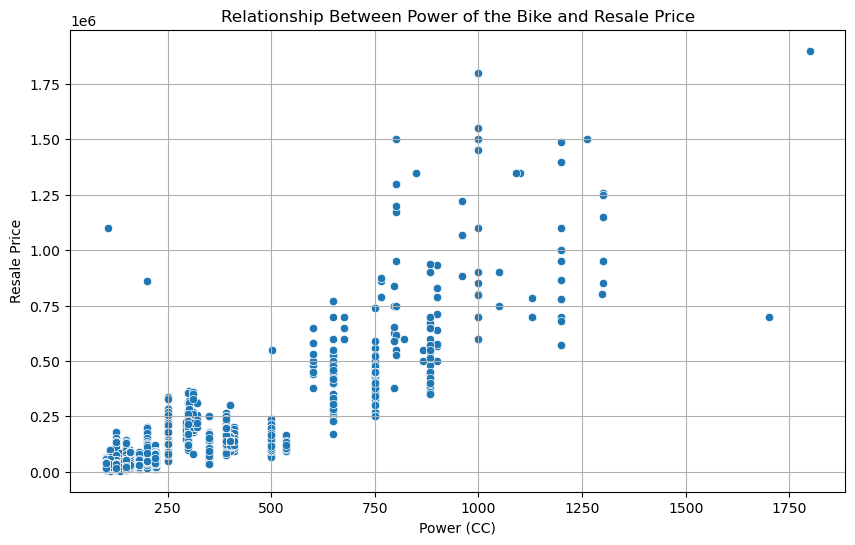

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='power', y='price', data=data_clean)
plt.title('Relationship Between Power of the Bike and Resale Price')
plt.xlabel('Power (CC)')
plt.ylabel('Resale Price')
plt.grid(True)
plt.show()


# 18.What is the distribution of bike power (in CC) in the dataset?


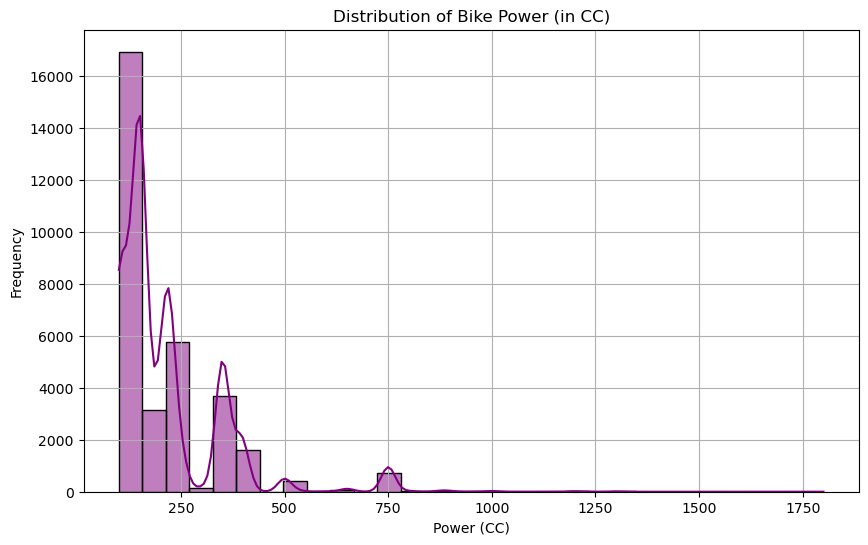

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['power'], bins=30, kde=True, color='purple')
plt.title('Distribution of Bike Power (in CC)')
plt.xlabel('Power (CC)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# 17.How does the resale price vary by the age of the bike?


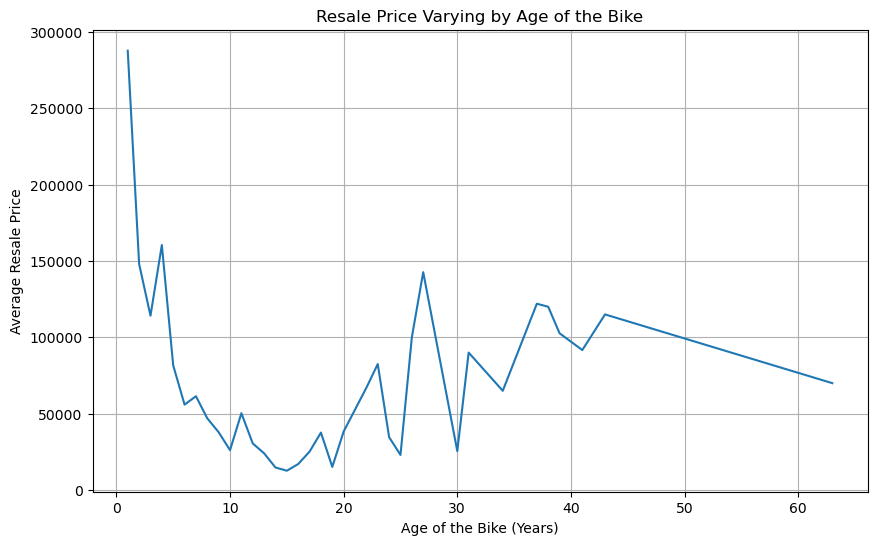

In [55]:
average_price_by_age = data_clean.groupby('age')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='price', data=average_price_by_age)
plt.title('Resale Price Varying by Age of the Bike')
plt.xlabel('Age of the Bike (Years)')
plt.ylabel('Average Resale Price')
plt.grid(True)
plt.show()


# 16.	What is the average resale price of bikes by different brands in different cities?


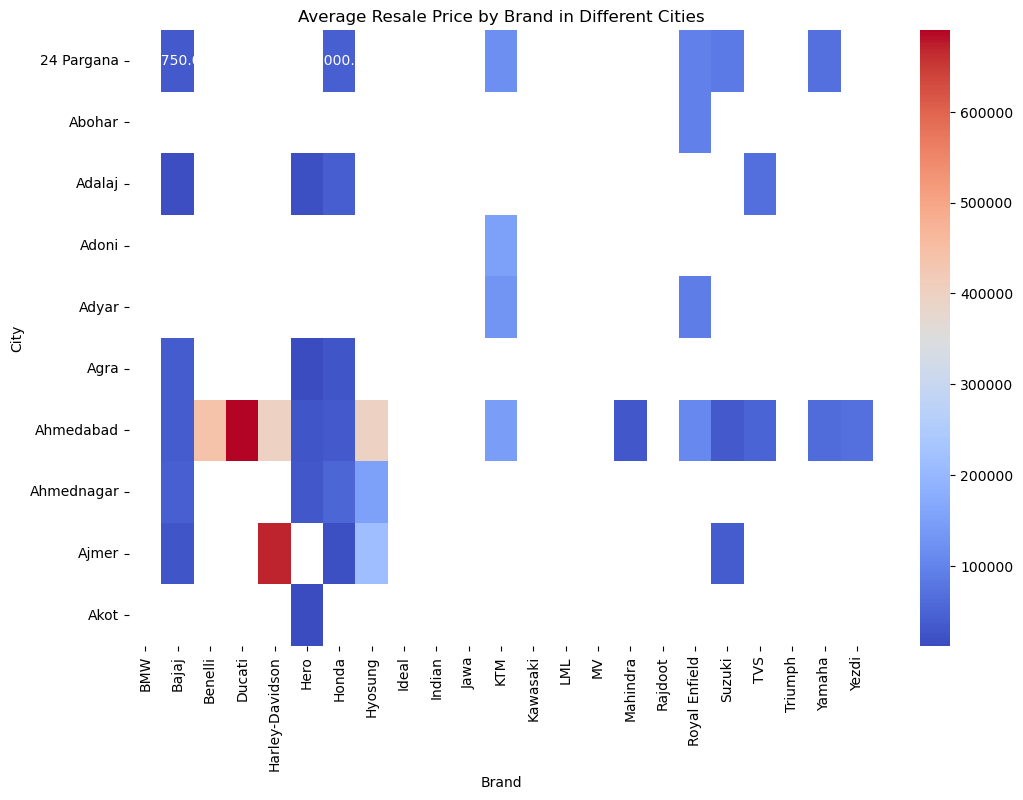

In [57]:
average_price_by_brand_and_city = data_clean.groupby(['city', 'brand'])['price'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(average_price_by_brand_and_city.head(10), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Resale Price by Brand in Different Cities')
plt.xlabel('Brand')
plt.ylabel('City')
plt.show()


# 4.How does the number of owners affect the resale price of bikes?


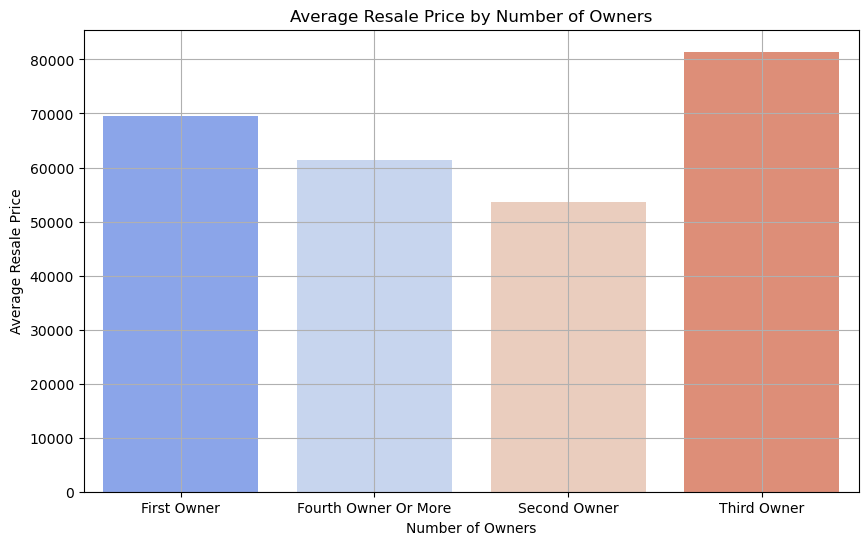

In [62]:
data_clean = data.dropna(subset=['price', 'owner'])

# Step 1: Calculate the Average Resale Price by Number of Owners
average_price_by_owners = data_clean.groupby('owner')['price'].mean().reset_index()

# Step 2: Plotting the Average Resale Price by Number of Owners
plt.figure(figsize=(10, 6))
sns.barplot(x='owner', y='price', data=average_price_by_owners, palette='coolwarm')
plt.title('Average Resale Price by Number of Owners')
plt.xlabel('Number of Owners')
plt.ylabel('Average Resale Price')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

# 14.What is the relationship between the power of the bike and its age?

Correlation between power and age: -0.34


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


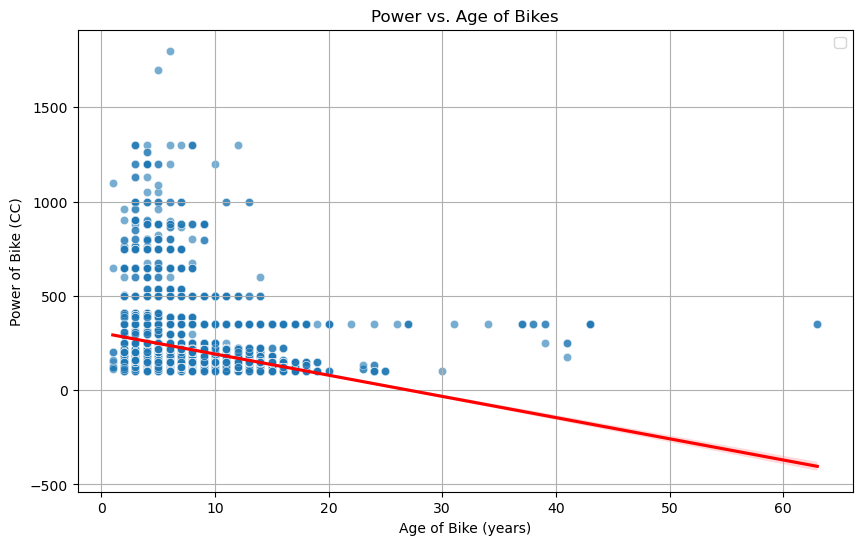

In [68]:

data_clean = data.dropna(subset=['power', 'age'])

# Calculate the Correlation
correlation = data_clean['power'].corr(data_clean['age'])
print(f'Correlation between power and age: {correlation:.2f}')

# Plotting the Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='power', data=data_clean, alpha=0.6)
sns.regplot(x='age', y='power', data=data_clean, scatter=False, color='red', line_kws={"label":"Regression Line"})

plt.title('Power vs. Age of Bikes')
plt.xlabel('Age of Bike (years)')
plt.ylabel('Power of Bike (CC)')
plt.legend()
plt.grid(True)
plt.show()
